In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Encoding Categorical Values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField']
encoder = LabelEncoder()
df[categorical_column] = df[categorical_column].apply(encoder.fit_transform)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Define Features and Target
Y = df['Attrition']
X = df.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [9]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_, Y = rus.fit_resample(X, Y)
X = pd.DataFrame(X_, columns=X.columns)

In [10]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [11]:
print("After Undersampling:")
print(Y.value_counts())

After Undersampling:
Attrition
0    237
1    237
Name: count, dtype: int64


In [12]:
# Decision Tree Function
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth=5):

    # train model
    dt = DecisionTreeClassifier(random_state=0, max_depth=my_depth, criterion='entropy')
    dt.fit(X_train, Y_train)

    # test model 
    Y_pred = dt.predict(X_test)

    # metrics
    print('Accuracy = ', accuracy_score(Y_test, Y_pred))
    print('F1 Score = ', f1_score(Y_test, Y_pred))
    print('Precision = ', precision_score(Y_test, Y_pred))
    print('Recall = ', recall_score(Y_test, Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

    # text representation of decision tree
    features = X_train.columns.tolist()
    text_representation = export_text(dt, feature_names=features)
    print('------------ Text Representation of Decision Tree ----------')
    print(text_representation)

    # plot decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(dt, feature_names=features, class_names=['No', 'Yes'], filled=True, fontsize=10)
    plt.title(f"Decision Tree (max_depth={my_depth})", fontsize=16)
    plt.show()

    return dt

Accuracy =  0.6526315789473685
F1 Score =  0.5714285714285714
Precision =  0.6111111111111112
Recall =  0.5365853658536586
Confusion Matrix:
 [[40 14]
 [19 22]]
------------ Text Representation of Decision Tree ----------
|--- OverTime <= 0.50
|   |--- StockOptionLevel <= 0.50
|   |   |--- JobRole <= 6.50
|   |   |   |--- JobSatisfaction <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- JobSatisfaction >  1.50
|   |   |   |   |--- class: 0
|   |   |--- JobRole >  6.50
|   |   |   |--- YearsWithCurrManager <= 4.00
|   |   |   |   |--- class: 1
|   |   |   |--- YearsWithCurrManager >  4.00
|   |   |   |   |--- class: 0
|   |--- StockOptionLevel >  0.50
|   |   |--- JobInvolvement <= 3.50
|   |   |   |--- EnvironmentSatisfaction <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- EnvironmentSatisfaction >  1.50
|   |   |   |   |--- class: 0
|   |   |--- JobInvolvement >  3.50
|   |   |   |--- class: 0
|--- OverTime >  0.50
|   |--- MonthlyIncome <= 2780.00
|   |   |--- EducationFi

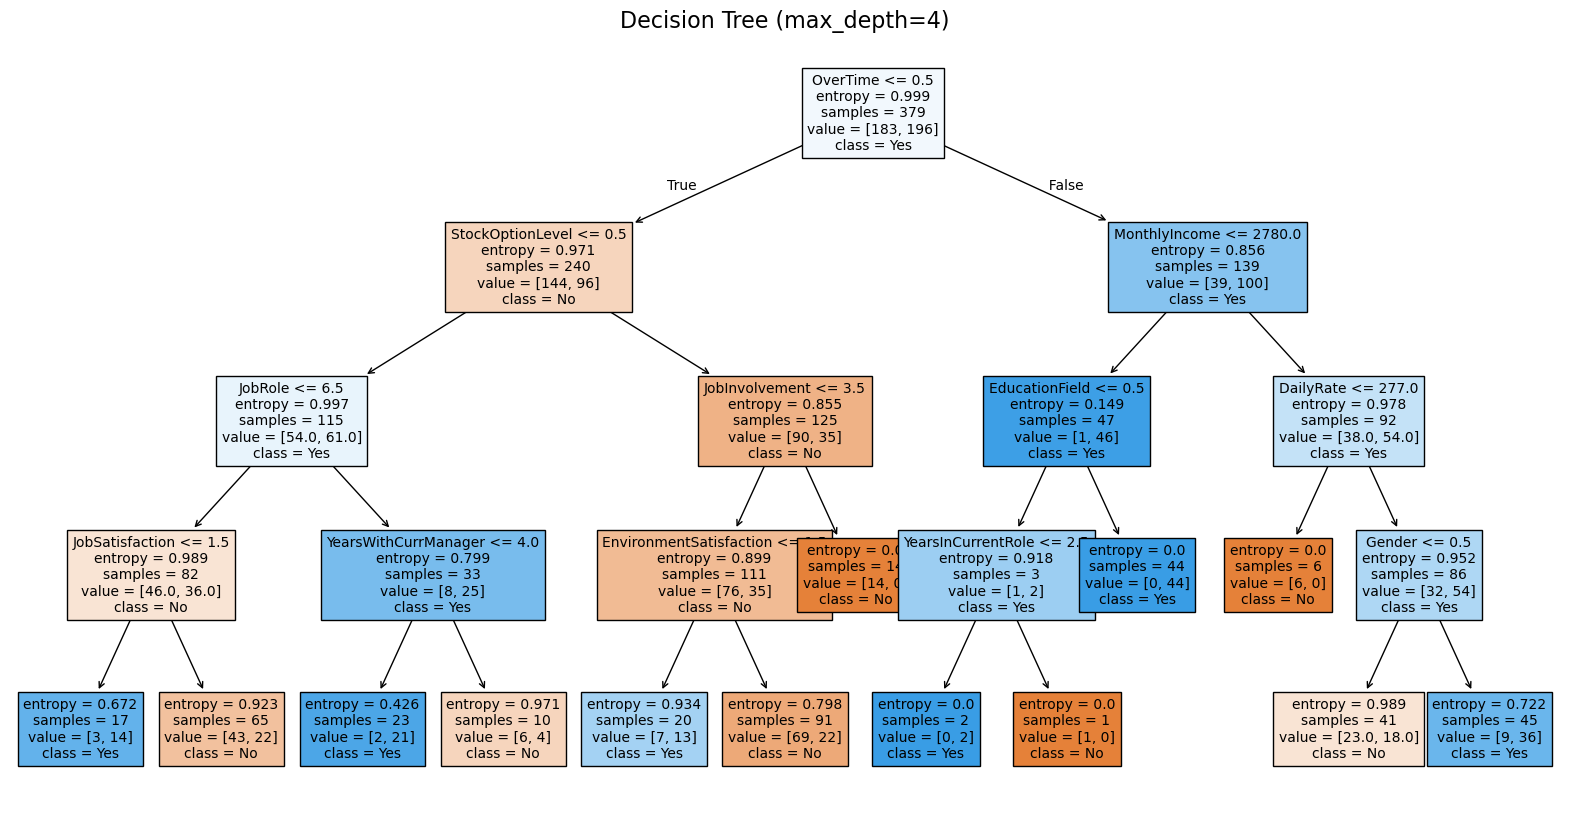

In [13]:
# Train and visualize
dt_model = decision_tree_maker(X_train, y_train, X_test, y_test, 4)

In [14]:
# Feature Importance
def get_feature_importance(dt, X_train):
    importances = dt.feature_importances_
    for importance, name in sorted(zip(importances, X_train.columns), reverse=True):
        print(name, importance)

    plt.figure(figsize=(10, 5))
    plt.bar(X_train.columns, importances, align='center')
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance for Decision Tree")
    plt.show()

OverTime 0.21586904447348076
MonthlyIncome 0.17873550794470255
StockOptionLevel 0.09243363325764978
JobSatisfaction 0.07839341377029874
Gender 0.07172246839264648
EnvironmentSatisfaction 0.06903766033853631
DailyRate 0.06555173533706382
JobRole 0.05840343348219188
JobInvolvement 0.0576970646909208
YearsWithCurrManager 0.05556743690897354
EducationField 0.034259882576967805
YearsInCurrentRole 0.02232871882656765
YearsSinceLastPromotion 0.0
YearsAtCompany 0.0
WorkLifeBalance 0.0
TrainingTimesLastYear 0.0
TotalWorkingYears 0.0
RelationshipSatisfaction 0.0
PerformanceRating 0.0
PercentSalaryHike 0.0
NumCompaniesWorked 0.0
MonthlyRate 0.0
MaritalStatus 0.0
JobLevel 0.0
HourlyRate 0.0
Education 0.0
DistanceFromHome 0.0
Department 0.0
BusinessTravel 0.0
Age 0.0


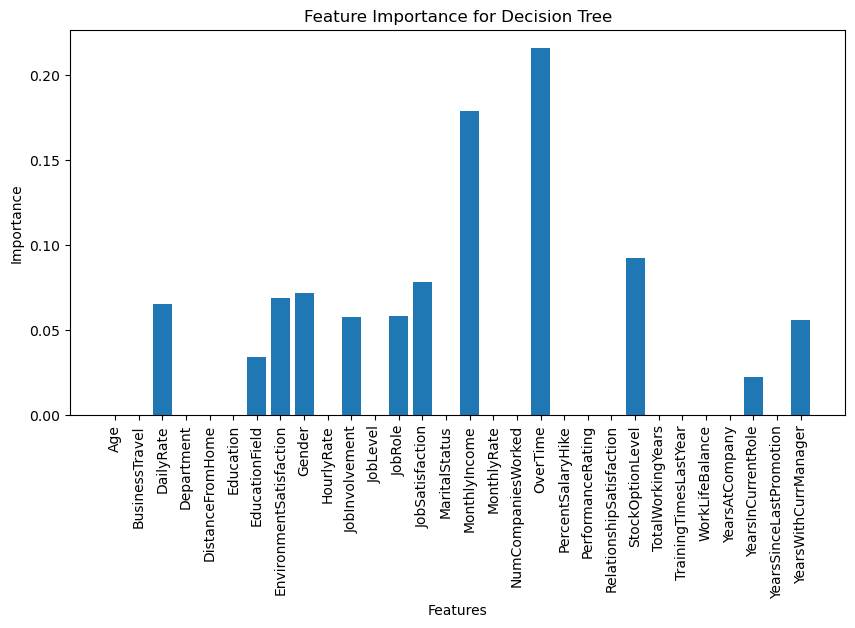

In [15]:
get_feature_importance(dt_model, X_train)

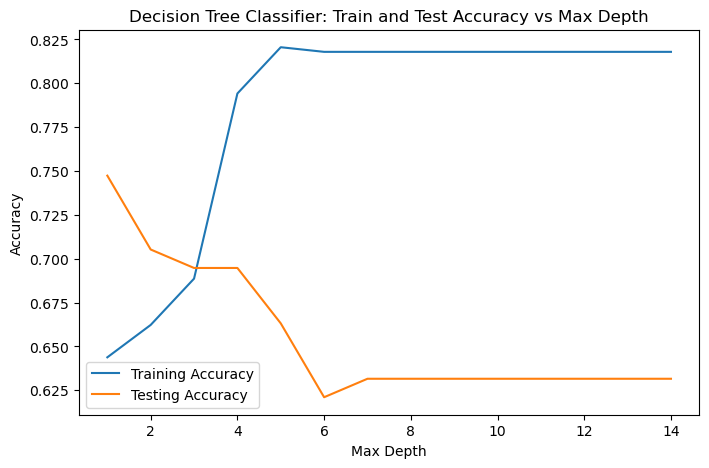

In [16]:
# Accuracy vs Depth
dt_train_accuracy = []
dt_test_accuracy = []

for i in np.arange(1, 15):
    param_grid = {'criterion': ['entropy', 'gini'], 'max_depth': [i], 
                  'max_leaf_nodes': [5, 10, 20, 50, 100], 'random_state': [0]}
    dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_pred = dt.predict(X_test)
    dt_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    dt_test_accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1, 15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1, 15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.show()

In [17]:
# GridSearchCV Function
def gcv(X_train, Y_train, X_test, Y_test):
    scoring = make_scorer(accuracy_score)
    max_depth = [int(x) for x in np.linspace(2, 15, num=10)]

    g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                        param_grid={'criterion': ['gini', 'entropy'],
                                    'max_depth': max_depth,
                                    'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                                    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                                    'min_samples_split': range(2, 10),
                                    'max_leaf_nodes': [5, 10, 20, 50, 100],
                                    'random_state': [0]},
                        scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, Y_train)
    print("Best Params:", g_cv.best_params_)

    # train new model with best params
    dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
    Y_pred = dt_classifier.predict(X_test)
    print('Accuracy = ', accuracy_score(Y_test, Y_pred))
    print('F1 Score = ', f1_score(Y_test, Y_pred))
    print('Precision = ', precision_score(Y_test, Y_pred))
    print('Recall = ', recall_score(Y_test, Y_pred))
    return dt_classifier, g_cv.best_params_

In [18]:
# Run Grid Search CV
dt_classifier, best_params_raw = gcv(X_train, y_train, X_test, y_test)

Best Params: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 0.33334, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Accuracy =  0.6947368421052632
F1 Score =  0.6506024096385542
Precision =  0.6428571428571429
Recall =  0.6585365853658537


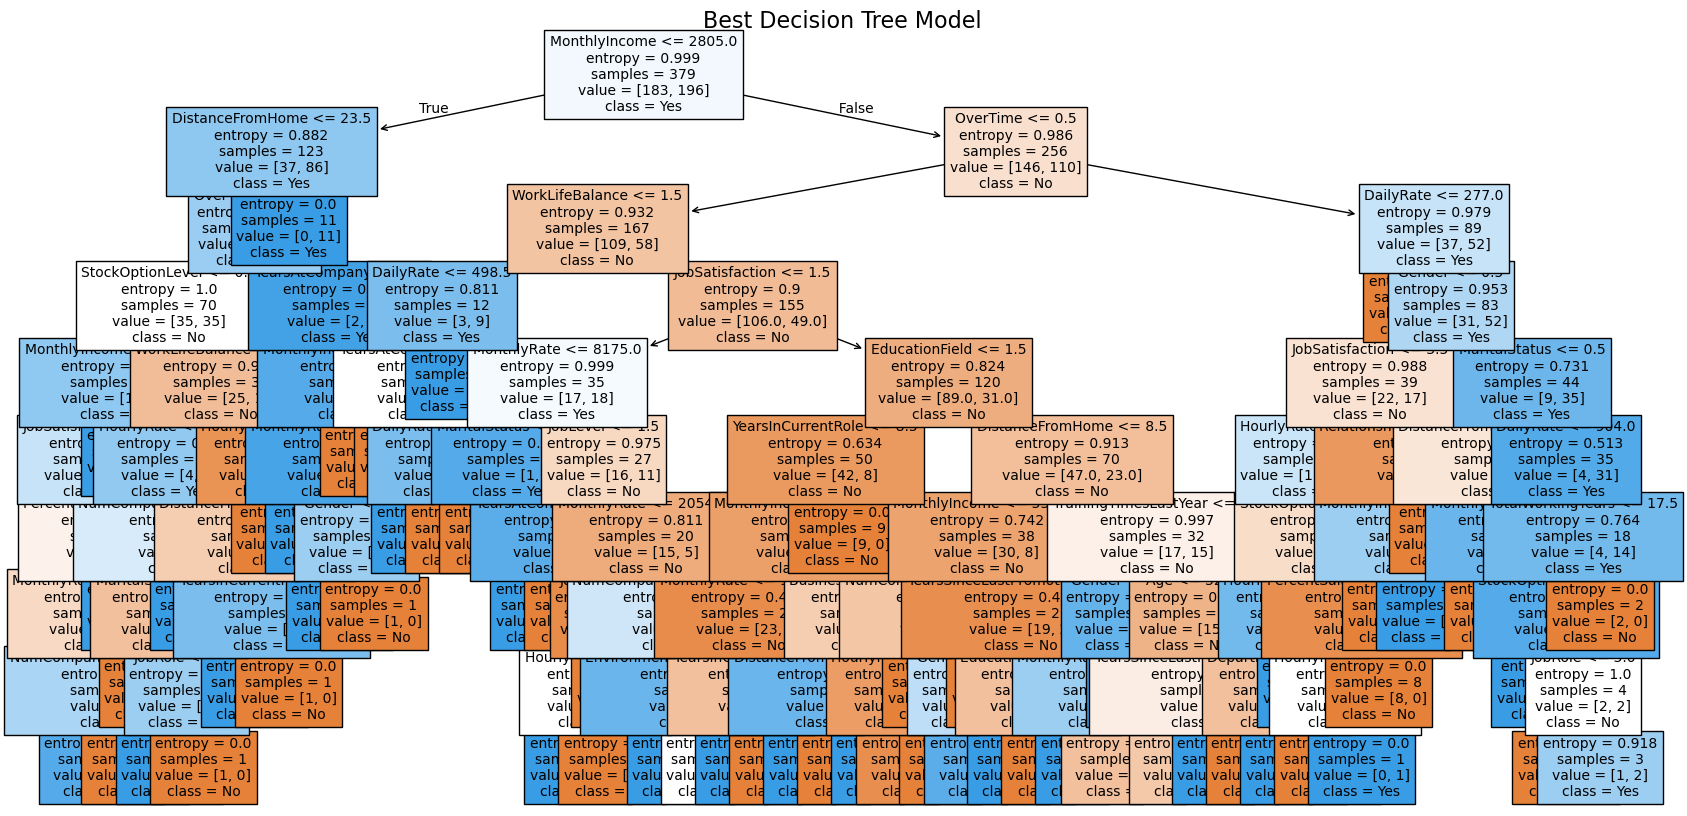

In [19]:
# Visualizing Best Model
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Best Decision Tree Model", fontsize=16)
plt.show()

MonthlyIncome 0.10441245463420132
OverTime 0.08773985235080312
MonthlyRate 0.08117135326629837
HourlyRate 0.07457621342277701
DistanceFromHome 0.06656227670805509
DailyRate 0.055272361670138825
NumCompaniesWorked 0.054560454156181354
StockOptionLevel 0.054514527132832426
Gender 0.05398827073438642
WorkLifeBalance 0.04413652180531118
JobSatisfaction 0.04349396515092365
MaritalStatus 0.0356736375007534
YearsInCurrentRole 0.03244013566195906
YearsAtCompany 0.028193805542214193
EducationField 0.02519835682096389
JobRole 0.02038679658243795
YearsSinceLastPromotion 0.01887435192318945
TrainingTimesLastYear 0.018009404660172965
JobLevel 0.017149545040366553
RelationshipSatisfaction 0.015239624421144913
Age 0.014905876958942032
TotalWorkingYears 0.014553661923719012
PercentSalaryHike 0.014488123638360237
BusinessTravel 0.011901745324683704
Department 0.007925770934656476
EnvironmentSatisfaction 0.004630912034527402
YearsWithCurrManager 0.0
PerformanceRating 0.0
JobInvolvement 0.0
Education 0.0

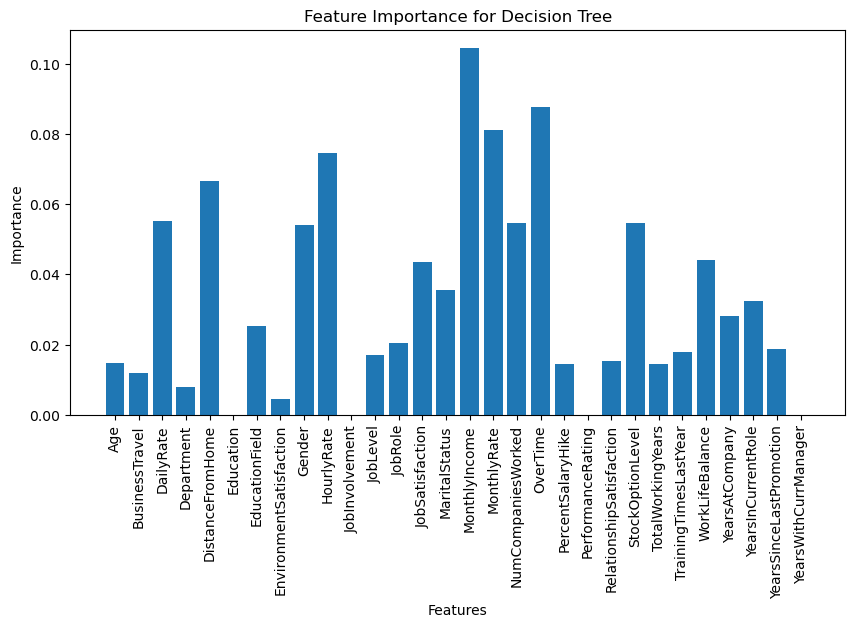

In [20]:
# Feature Importance for Best Model
get_feature_importance(dt_classifier, X_train)

In [21]:
# K-Fold Cross Validation
def cross_validation(model, X, y, my_cv=5):
    scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print(scores)
    print("Accuracy: ", np.mean(scores['test_accuracy']))
    print("Precision: ", np.mean(scores['test_precision']))
    print("Recall: ", np.mean(scores['test_recall']))
    print("F1 Score: ", np.mean(scores['test_f1']))

In [22]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.0173583 , 0.01969194, 0.00817776, 0.00644183, 0.00828338]), 'score_time': array([0.01651788, 0.02062988, 0.01769733, 0.01445508, 0.01386094]), 'test_accuracy': array([0.63157895, 0.70526316, 0.66315789, 0.63157895, 0.69148936]), 'test_precision': array([0.64285714, 0.75675676, 0.7       , 0.63829787, 0.6875    ]), 'test_recall': array([0.57446809, 0.59574468, 0.58333333, 0.625     , 0.70212766]), 'test_f1': array([0.60674157, 0.66666667, 0.63636364, 0.63157895, 0.69473684])}
Accuracy:  0.6646136618141097
Precision:  0.685082354390865
Recall:  0.6161347517730495
F1 Score:  0.647217533107539
